In [1]:
from scipy.stats import ttest_1samp
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('AB_Test_Results.xlsx')

In [5]:
df.head(10)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
5,2380,variant,0.0
6,2849,control,0.0
7,9168,control,0.0
8,6205,variant,0.0
9,7548,control,0.0


In [7]:
df.shape

(10000, 3)

In [9]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [11]:
#Избавимся от некорретных строк. 
v = df.\
    groupby('USER_ID', as_index=False).\
    agg({'VARIANT_NAME': pd.Series.nunique})

In [14]:
v.head(10)

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
5,9,1
6,10,2
7,11,1
8,12,1
9,13,1


In [26]:
more_than_one_types = v.query('VARIANT_NAME > 1')

In [27]:
df_new = df[~df.USER_ID.isin(more_than_one_types.USER_ID)].sort_values('USER_ID')

In [28]:
# Размер таблицы составил:
df_new.shape

(6070, 3)

In [31]:
control = df_new.query('VARIANT_NAME == "control"')

test = df_new.query('VARIANT_NAME == "variant"')

In [32]:
len(control)

3026

In [33]:
len(test)

3044

In [34]:
from scipy.stats import shapiro

In [35]:
alpha = 0.05

st = shapiro(df.REVENUE)
print('Distribution is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]));

Distribution is not normal



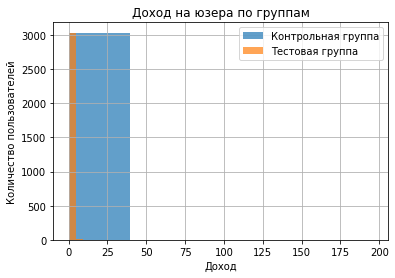

In [41]:
control.REVENUE.hist(bins =5, alpha =0.7, label='Контрольная группа')
test.REVENUE.hist(bins = 5, alpha =0.7, label='Тестовая группа')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Количество пользователей')
plt.legend();

In [45]:
import scipy.stats as stats
stats.ttest_ind(control.REVENUE.values, test.REVENUE.values, equal_var = False)

Ttest_indResult(statistic=1.403762252371675, pvalue=0.1604844017690842)

In [52]:
C_mean = control.REVENUE.values.mean()
T_mean = test.REVENUE.values.mean()
C_std = control.REVENUE.values.std()
T_std = test.REVENUE.values.std()

In [55]:
S = np.sqrt((T_std**2 + C_std **2)/ 2)
n =  len(control.REVENUE.values)

In [56]:
effect =float((T_mean-C_mean)/ S) 

In [57]:
# Рассчитаем мощность теста:
alpha = 0.05
from statsmodels.stats.power import TTestIndPower
from math import sqrt
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=None,
nobs1=n, ratio=1.0, alpha=alpha)

result

0.2893670730459212

Вывод: получаем очень низкую мощность теста, примерно 30 %, в данном случае нельзя быть уверенными в результатах теста,так как недостаточное количество выборки и просто могли не получить статистически значимые данные, так же некорректно поставлен сам тест, так как повторяются несколько раз одни и те же юзера. 
Рекомендации: перезапустить тест, составить тест более корректно. рассчитать предварительно необходимую выборку и получить актуальные данные. А пока не выкатывать новую версию, дождаться результатов перезапущенного теста.